# Empirical analysis on securities
## By Letizia Dimonopoli
### Student ID: 3132775

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
from tabulate import tabulate

In [114]:
# uploading the Nvidia dataset
df_train = pd.read_csv("/Users/dimonopoli/Desktop/final paper/NVDA.csv")
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376358,271468800
1,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
2,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
3,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
4,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000


In [115]:
# uploading the Tether dataset
df_tok_assets = pd.read_csv("/Users/dimonopoli/Desktop/final paper/USDT-USD.csv")
df_tok_assets.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000
1,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
2,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
3,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
4,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032


### 1. Cleaning and preparation of the Nvidia and Tether datasets

For the Nvidia dataset

In [116]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6122.000000,6122.000000,6122.000000,6122.000000,6122.000000,6.122000e+03
mean,32.083172,32.698178,31.452291,32.105539,31.846044,6.128430e+07
std,61.979191,63.229129,60.681098,62.022923,62.028533,4.400809e+07
min,0.348958,0.355469,0.333333,0.341146,0.313034,1.968000e+06
25%,2.677500,2.758750,2.603333,2.677500,2.456865,3.438680e+07
50%,4.320000,4.412500,4.245000,4.335000,3.981222,5.138220e+07
75%,27.708750,27.966875,27.088750,27.643750,27.279851,7.457340e+07
max,335.170013,346.470001,320.359985,333.760010,333.350800,9.230856e+08


In [117]:
# missing data Nvidia
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=["Total", "Percent"])
missing_data_train

,Total,Percent
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Adj Close,0,0.0
Volume,0,0.0


For Tether dataset

In [118]:
df_tok_assets.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1.658000e+03
mean,1.001815,1.008433,0.996067,1.001816,1.001816,4.039061e+10
std,0.006087,0.010536,0.008294,0.006034,0.006034,3.979689e+10
min,0.972522,0.978690,0.899490,0.966644,0.966644,3.581880e+08
25%,1.000041,1.001122,0.993818,1.000043,1.000043,4.279052e+09
50%,1.000714,1.006298,0.998211,1.000668,1.000668,3.027514e+10
75%,1.003138,1.012296,1.000029,1.002973,1.002973,6.100956e+10
max,1.080950,1.105910,1.021830,1.077880,1.077880,2.790675e+11


In [119]:
# missing data Tether
total_train = df_tok_assets.isnull().sum().sort_values(ascending=False)
percent_train = (df_tok_assets.isnull().sum()/df_tok_assets.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=["Total", "Percent"])
missing_data_train

,Total,Percent
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Adj Close,0,0.0
Volume,0,0.0


The dataset presents no missing data, which is advantageous for the analysis.

Now we merge the datasets:

In [120]:
# since the Tether dataset is smaller, I will only consider the dates of that dataset even for the stocks dataset
df_train_new = df_train[(df_train["Date"] >= "2017-11-09") & (df_train["Date"] <= "2022-05-24")]

In [121]:
df_tok_assets.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000
1,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
2,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
3,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
4,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032


In [122]:
df_train_new.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4732,2017-11-09,51.317501,51.582500,50.092499,51.330002,50.768211,97856400
4733,2017-11-10,53.270000,54.667500,52.907501,54.035000,53.443600,125325600
4734,2017-11-13,54.035000,54.292500,53.002499,53.157501,52.575703,58237600
4735,2017-11-14,53.250000,53.700001,52.807499,53.544998,52.958961,52929200
4736,2017-11-15,52.987499,53.000000,51.950001,52.494999,51.920467,50194800


In [123]:
df_train_new.reset_index(inplace=True, drop=True)
df_tok_assets.reset_index(inplace=True, drop=True)

In [124]:
df_tok_assets.rename(columns={"Volume": "Tether_Volume"}, inplace=True)

In [125]:
df_merged = pd.concat([df_train_new, df_tok_assets[["Tether_Volume"]]], axis=1)

In [126]:
df_merged.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tether_Volume
0,2017-11-09,51.317501,51.582500,50.092499,51.330002,50.768211,97856400.0,358188000
1,2017-11-10,53.270000,54.667500,52.907501,54.035000,53.443600,125325600.0,756446016
2,2017-11-13,54.035000,54.292500,53.002499,53.157501,52.575703,58237600.0,746227968
3,2017-11-14,53.250000,53.700001,52.807499,53.544998,52.958961,52929200.0,1466060032
4,2017-11-15,52.987499,53.000000,51.950001,52.494999,51.920467,50194800.0,767884032


The main study I would like to carry out in my analysis relates to the liquidity. In fact, liquidity represents one of the major benefits tokenization would bring. 

### 2. Computing the Price Impact

In [145]:
perc_price_change = df_merged["Close"].pct_change()* 100
perc_vol_change = df_merged["Volume"].pct_change()* 100
df_merged["Price_Impact"] = perc_price_change / perc_vol_change
df_merged["Price_Impact"] = round(df_merged["Price_Impact"],2)
df_merged.dropna(inplace=True)

In [146]:
df_merged["Price_Impact"] 

4       0.38
5      -0.06
6      -0.01
7      -0.06
8       1.18
        ... 
1137    0.98
1138    0.08
1139   -0.13
1140   -0.09
1141    0.55
Name: Price_Impact, Length: 1138, dtype: float64

In [147]:
average_price_impact = df_merged["Price_Impact"].mean()
print(f"The average price impact is: {average_price_impact}")

The average price impact is: -0.20543936731107207


### 3. Computing the Bid-Ask Spread

In [148]:
df_merged['Mid_Price'] = (df_merged['High'] + df_merged['Low']) / 2

df_merged['Spread'] = ((df_merged['High'] - df_merged['Low']) / (2 * df_merged['Mid_Price'])) * 100

In [149]:
avg_spread_perc = df_merged['Spread'].mean()
print(f'The average bid-ask spread percentage is: {avg_spread_perc}')

The average bid-ask spread percentage is: 1.8231749070554248


### 4. Forecasting 1: Training the Linear Regression model

Linear regression with price impact as dependent variable 

In [150]:
# forecast how the tokenization process may impact the liquidity of securities based on the relationship 
# between tokenization and liquidity in non-tokenized securities
X = df_merged[['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume']]
y = df_merged['Price_Impact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # training and test sets

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

print("\nTest Set:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")

Training Set:
Mean Squared Error: 2.1107383130649673
R-squared: 0.027008138927724024

Test Set:
Mean Squared Error: 37.963488951201214
R-squared: 0.004858646065350358


Linear regression with bid-ask spread as dependent variable

In [45]:
# forecast how the tokenization process may impact the liquidity of securities based on the relationship 
# between tokenization and liquidity in non-tokenized securities
X = df_merged[['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume']]
y = df_merged['Spread']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # training and testing sets

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

coefficient = model.coef_[X.columns.get_loc('Tether_Volume')] 
# the coefficient is needed to infer a positive (or negative) effect on liquidity

print("Training Set:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

print("\nTest Set:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")

print(f"\nCoefficient of Tether_Volume: {coefficient}")

Training Set:
Mean Squared Error: 0.24701628909865098
R-squared: 0.7868287216688437

Test Set:
Mean Squared Error: 0.3031623952980826
R-squared: 0.7175457041920794

Coefficient of Tether_Volume: 5.136474579003902e-12


In [46]:
# p-values
model = LinearRegression().fit(X, y)

X = sm.add_constant(X)

model_sm = sm.OLS(y, X).fit()

p_values = model_sm.pvalues
print(p_values)

const            3.018028e-63
High             4.116044e-69
Low              2.279467e-95
Close            1.523293e-01
Open             7.437366e-03
Volume           4.290328e-83
Tether_Volume    6.397343e-09
dtype: float64


In [47]:
print(p_values[6])
print(f"Is the coefficient statistically significant? {p_values[1] < 0.05}")

6.397342918859562e-09
Is the coefficient statistically significant? True


/var/folders/mp/185tqzt15qd296cn272z83vh0000gp/T/ipykernel_18355/3841785768.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(p_values[6])
/var/folders/mp/185tqzt15qd296cn272z83vh0000gp/T/ipykernel_18355/3841785768.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Is the coefficient statistically significant? {p_values[1] < 0.05}")


In [48]:
p_values[1:7]

High             4.116044e-69
Low              2.279467e-95
Close            1.523293e-01
Open             7.437366e-03
Volume           4.290328e-83
Tether_Volume    6.397343e-09
dtype: float64

In [49]:
#table = [['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume', p_values, True if p_values[1] < 0.05 else False]]
significance = [True if p < 0.05 else False for p in p_values]
#table = [['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume', p_values[i], significance[i]] for i in range(1,7)]
table = [[var_name, p_values[i+1], significance[i+1]] for i, var_name in enumerate(['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume'])]
headers = ["Variable", "Coefficient", "Statistically Significant"]
print(tabulate(table, headers=headers, tablefmt="grid"))

+---------------+---------------+-----------------------------+
| Variable      |   Coefficient | Statistically Significant   |
+===============+===============+=============================+
| High          |   4.11604e-69 | True                        |
+---------------+---------------+-----------------------------+
| Low           |   2.27947e-95 | True                        |
+---------------+---------------+-----------------------------+
| Close         |   0.152329    | False                       |
+---------------+---------------+-----------------------------+
| Open          |   0.00743737  | True                        |
+---------------+---------------+-----------------------------+
| Volume        |   4.29033e-83 | True                        |
+---------------+---------------+-----------------------------+
| Tether_Volume |   6.39734e-09 | True                        |
+---------------+---------------+-----------------------------+


/var/folders/mp/185tqzt15qd296cn272z83vh0000gp/T/ipykernel_18355/1471000560.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  table = [[var_name, p_values[i+1], significance[i+1]] for i, var_name in enumerate(['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume'])]


The coefficient is positive, thus it indicates a strong relationship between the independent variables and the dependent variable. We also see that the p-value for the coefficient "Tether_Volume", which is a proxy for tokenization is statistically significant, holding other variables constant. Thus, this conferms our initial hypothesis, suggesting that tokenization has a positive impact on liquidity. In essence it means that, as tokenization increases, liquidity tends to improve.

In [50]:
# ANOVA train set
import statsmodels.api as sm
from statsmodels.formula.api import ols

train_data = pd.concat([X_train, y_train], axis=1)

model = ols('Spread ~ High + Low + Close + Open + Volume + Tether_Volume', data=train_data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

headers = ["Variable", "DF", "Sum Sq", "F", "PR(>F)"]
anova_results = [[anova_table.index[i], int(anova_table["df"][i]), 
                  anova_table["sum_sq"][i], anova_table["F"][i], 
                  anova_table["PR(>F)"][i]] for i in range(len(anova_table))]


print(tabulate(anova_results, headers=headers, tablefmt="grid"))

                   sum_sq     df           F        PR(>F)
High            44.716387    1.0  178.802940  1.303012e-35
Low             69.175272    1.0  276.604232  8.075288e-51
Close            0.623897    1.0    2.494715  1.147907e-01
Open             0.529577    1.0    2.117568  1.461749e-01
Volume          67.566758    1.0  270.172428  7.090787e-50
Tether_Volume    2.843603    1.0   11.370431  7.974503e-04
Residual       140.799285  563.0         NaN           NaN
+---------------+------+------------+-----------+---------------+
| Variable      |   DF |     Sum Sq |         F |        PR(>F) |
+===============+======+============+===========+===============+
| High          |    1 |  44.7164   | 178.803   |   1.30301e-35 |
+---------------+------+------------+-----------+---------------+
| Low           |    1 |  69.1753   | 276.604   |   8.07529e-51 |
+---------------+------+------------+-----------+---------------+
| Close         |    1 |   0.623897 |   2.49472 |   0.114791    |


/var/folders/mp/185tqzt15qd296cn272z83vh0000gp/T/ipykernel_18355/4175712308.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results = [[anova_table.index[i], int(anova_table["df"][i]),
/var/folders/mp/185tqzt15qd296cn272z83vh0000gp/T/ipykernel_18355/4175712308.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_table["sum_sq"][i], anova_table["F"][i],
/var/folders/mp/185tqzt15qd296cn272z83vh0000gp/T/ipykernel_18355/4175712308.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

In [84]:
# ANOVA test set
test_data = pd.concat([X_test, y_test], axis=1)

test_model = ols('Spread ~ High + Low + Close + Open + Volume + Tether_Volume', data=test_data).fit()

anova_table_test = sm.stats.anova_lm(test_model, typ=2)
print(anova_table_test)

anova_results_test = [[anova_table_test.index[i], int(anova_table_test["df"][i]), 
                       anova_table_test["sum_sq"][i], anova_table_test["F"][i], 
                       anova_table_test["PR(>F)"][i]] for i in range(len(anova_table_test))]

print(tabulate(anova_results_test, headers=headers, tablefmt="grid"))

                   sum_sq     df           F        PR(>F)
High            53.145917    1.0  180.453124  6.824192e-36
Low             72.260007    1.0  245.353636  3.541890e-46
Close            0.083853    1.0    0.284717  5.938361e-01
Open             1.317950    1.0    4.475004  3.483189e-02
Volume          52.897378    1.0  179.609228  9.412848e-36
Tether_Volume    6.911924    1.0   23.468940  1.642516e-06
Residual       166.105727  564.0         NaN           NaN
+---------------+------+-------------+------------+---------------+
| Variable      |   DF |      Sum Sq |          F |        PR(>F) |
+===============+======+=============+============+===============+
| High          |    1 |  53.1459    | 180.453    |   6.82419e-36 |
+---------------+------+-------------+------------+---------------+
| Low           |    1 |  72.26      | 245.354    |   3.54189e-46 |
+---------------+------+-------------+------------+---------------+
| Close         |    1 |   0.0838531 |   0.284717 | 

/var/folders/mp/185tqzt15qd296cn272z83vh0000gp/T/ipykernel_19310/1570028827.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results_test = [[anova_table_test.index[i], int(anova_table_test["df"][i]),
/var/folders/mp/185tqzt15qd296cn272z83vh0000gp/T/ipykernel_19310/1570028827.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_table_test["sum_sq"][i], anova_table_test["F"][i],
/var/folders/mp/185tqzt15qd296cn272z83vh0000gp/T/ipykernel_19310/1570028827.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Let's implement the Gradient Boosting model and the Random Forest model.

### 5. Forecasting 2: Training the Gradient Boosting model 

In [125]:
X = df_merged[['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume']]
y = df_merged['Spread']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

feature_importance = gb_model.feature_importances_

print(f"Mean Squared Error (Gradient Boosting - Train): {mse_train_gb}")
print(f"R-squared (Gradient Boosting - Train): {r2_train_gb} \n")

print(f"Mean Squared Error (Gradient Boosting - Test): {mse_gb}")
print(f"R-squared (Gradient Boosting - Test): {r2_gb}\n")

print(f"Feature Importance: {feature_importance}")

# creating a table below
features = df_merged[['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume']]
table_data = zip(features, feature_importance)
table = tabulate(table_data, headers=['Feature', 'Importance'], tablefmt='grid')
print(table)

Mean Squared Error (Gradient Boosting - Train): 0.20251175763699705
R-squared (Gradient Boosting - Train): 0.8274530696786015 

Mean Squared Error (Gradient Boosting - Test): 0.36768192450855625
R-squared (Gradient Boosting - Test): 0.5846348881866497

Feature Importance: [0.06782666 0.10834925 0.02968709 0.05373858 0.60963408 0.13076435]
+---------------+--------------+
| Feature       |   Importance |
+===============+==============+
| High          |    0.0678267 |
+---------------+--------------+
| Low           |    0.108349  |
+---------------+--------------+
| Close         |    0.0296871 |
+---------------+--------------+
| Open          |    0.0537386 |
+---------------+--------------+
| Volume        |    0.609634  |
+---------------+--------------+
| Tether_Volume |    0.130764  |
+---------------+--------------+


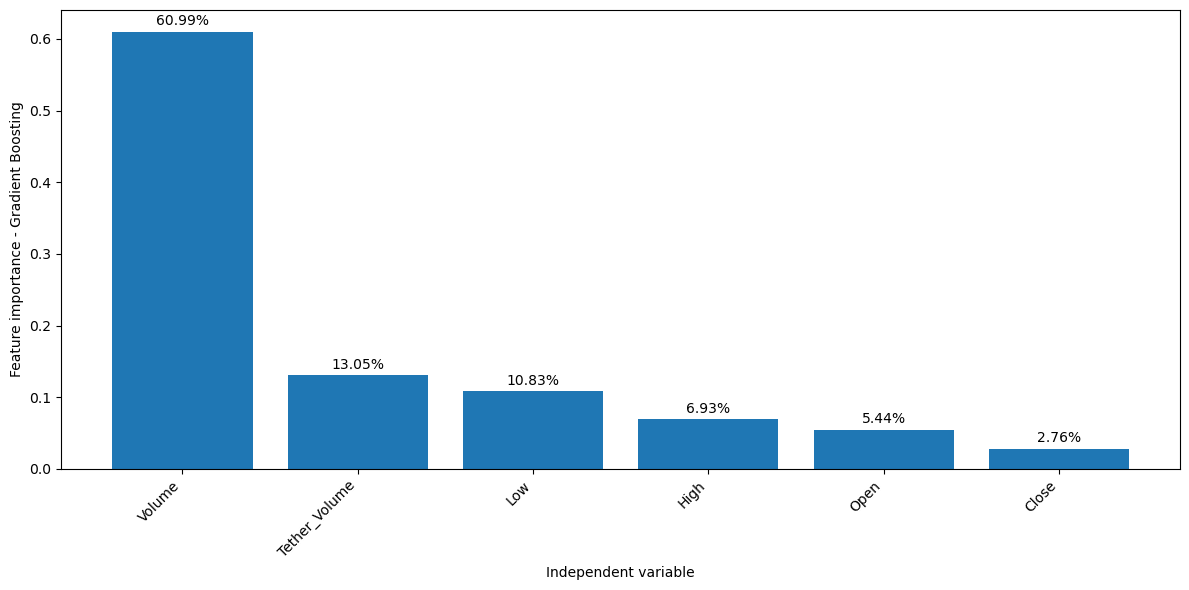

In [86]:
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = features.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]


plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(sorted_features)), sorted_importance, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.xlabel('Independent variable')
plt.ylabel('Feature importance - Gradient Boosting')
plt.tight_layout()

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{sorted_importance[i]*100:.2f}%', ha='center', va='bottom')

plt.show()

Higher values indicate more important features.
We can see the two most important are Volume and Tether Volume.

'Volume' (of non-tokenized securities) plays a significant role in determining liquidity. 'Tether_Volume' (of tokenized assets) also adds to the predictive power of the model even though it's the second best.

### 6. Forecasting 3: Training the Random Forest model

In [101]:
X = df_merged[['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume']]
y = df_merged['Spread']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

feature_importance = rf_model.feature_importances_

print(f"Mean Squared Error (Random Forest - Training): {mse_rf_train}")
print(f"R-squared (Random Forest - Training): {r2_rf_train}\n")

print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"R-squared (Random Forest): {r2_rf}\n")
print(feature_importance)

Mean Squared Error (Random Forest - Training): 0.07013230864758822
R-squared (Random Forest - Training): 0.9402448790396383

Mean Squared Error (Random Forest): 0.4064746801669169
R-squared (Random Forest): 0.5408112563529124

[0.07104049 0.067034   0.05072875 0.07262297 0.57700255 0.16157124]


In [61]:
# the Tether volume feature is the last one so -1
tether_volume_importance_rf = rf_model.feature_importances_[-1]

print(f"Importance of Tether_Volume (Random Forest): {tether_volume_importance_rf}")

Importance of Tether_Volume (Random Forest): 0.16210486667661064


In [64]:
features = df_merged[['High', 'Low', 'Close', 'Open', 'Volume', 'Tether_Volume']]
table_data = zip(features, feature_importance)
table = tabulate(table_data, headers=['Feature', 'Importance'], tablefmt='grid')
print(table)

+---------------+--------------+
| Feature       |   Importance |
+===============+==============+
| High          |    0.0649364 |
+---------------+--------------+
| Low           |    0.0759916 |
+---------------+--------------+
| Close         |    0.0586315 |
+---------------+--------------+
| Open          |    0.0730082 |
+---------------+--------------+
| Volume        |    0.565327  |
+---------------+--------------+
| Tether_Volume |    0.162105  |
+---------------+--------------+


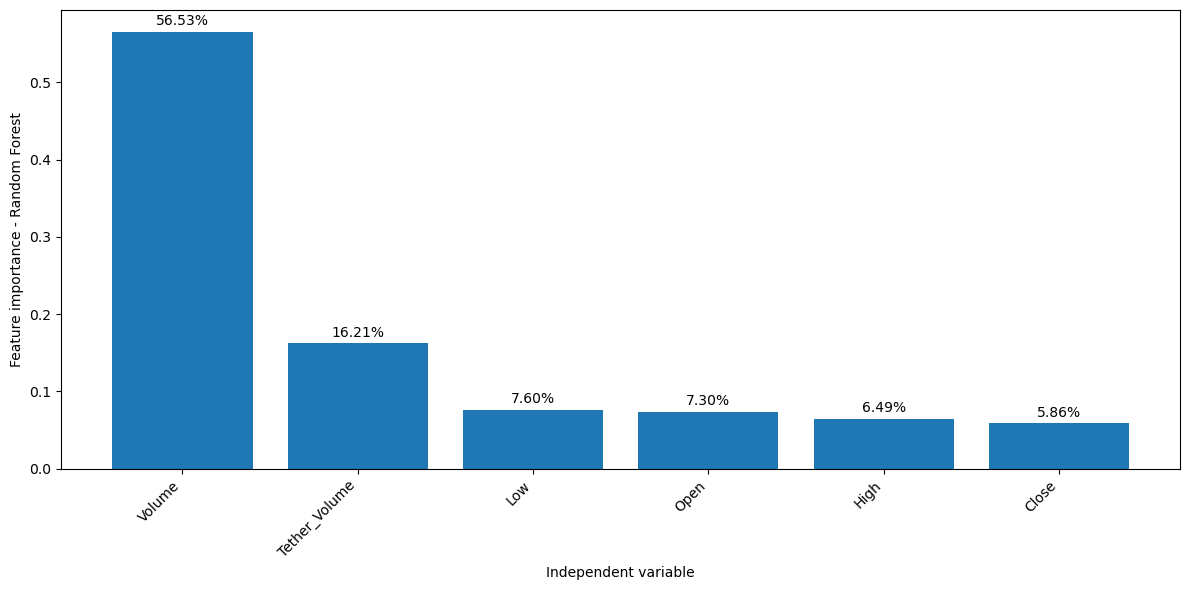

In [63]:
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = features.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(sorted_features)), sorted_importance, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.xlabel('Independent variable')
plt.ylabel('Feature importance - Random Forest')
plt.tight_layout()

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{sorted_importance[i]*100:.2f}%', ha='center', va='bottom')

plt.show()

### 7. Comparing the 3 models

In [126]:
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = {'Model': [], 'R-squared Training set': [], 'R-squared Test set': [], 'MSE Training set': [], 'MSE Test set': []}


for name, model in models.items():
    results['Model'].append(name)

results['R-squared Training set'].append(r2_train)
results['R-squared Training set'].append(r2_train_gb)
results['R-squared Training set'].append(r2_rf_train)

results['R-squared Test set'].append(r2_test)
results['R-squared Test set'].append(r2_gb)
results['R-squared Test set'].append(r2_rf)

results['MSE Training set'].append(mse_train)
results['MSE Training set'].append(mse_train_gb)
results['MSE Training set'].append(mse_rf_train)

results['MSE Test set'].append(mse_test)
results['MSE Test set'].append(mse_gb)
results['MSE Test set'].append(mse_rf)

results

{'Model': ['Linear Regression', 'Gradient Boosting', 'Random Forest'],
 'R-squared Training set': [0.7868287216688437,
  0.8274530696786015,
  0.9402448790396383],
 'R-squared Test set': [0.7175457041920794,
  0.5846348881866497,
  0.5408112563529124],
 'MSE Training set': [0.24701628909865098,
  0.20251175763699705,
  0.07013230864758822],
 'MSE Test set': [0.3031623952980826, 0.36768192450855625, 0.4064746801669169]}

In [127]:
df_results = pd.DataFrame(results)

In [128]:
df_results

,Model,R-squared Training set,R-squared Test set,MSE Training set,MSE Test set
0,Linear Regression,0.786829,0.717546,0.247016,0.303162
1,Gradient Boosting,0.827453,0.584635,0.202512,0.367682
2,Random Forest,0.940245,0.540811,0.070132,0.406475


In [129]:
# trying to reduce overfitting
X = df_merged[['Low', 'Volume', 'Tether_Volume']]
y = df_merged['Spread']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = {'Model': [], 'R-squared Training set': [], 'R-squared Test set': [], 'MSE Training set': [], 'MSE Test set': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    results['Model'].append(name)
    results['R-squared Training set'].append(r2_train)
    results['R-squared Test set'].append(r2_test)
    results['MSE Training set'].append(mse_train)
    results['MSE Test set'].append(mse_test)

results

{'Model': ['Linear Regression', 'Gradient Boosting', 'Random Forest'],
 'R-squared Training set': [0.5012013305640133,
  0.7593691839841015,
  0.9363094839163945],
 'R-squared Test set': [0.522800086881209,
  0.5240258615856356,
  0.641839912779303],
 'MSE Training set': [0.5572172117820557,
  0.26881313160043907,
  0.071149852563152],
 'MSE Test set': [0.48697777334888026,
  0.48572688243339845,
  0.3654988129341043]}

In [130]:
df_results = pd.DataFrame(results)

In [131]:
df_results

,Model,R-squared Training set,R-squared Test set,MSE Training set,MSE Test set
0,Linear Regression,0.501201,0.522800,0.557217,0.486978
1,Gradient Boosting,0.759369,0.524026,0.268813,0.485727
2,Random Forest,0.936309,0.641840,0.071150,0.365499
